# 1. Importamos librerías

In [302]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

plt.rcParams["figure.figsize"] = (16,8)

# 2. Regresión

In [303]:
!curl -O https://raw.githubusercontent.com/next-guillermofernandez/ninja-ml-workshop/main/house-prices/train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  449k  100  449k    0     0  1489k      0 --:--:-- --:--:-- --:--:-- 1489k


In [304]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


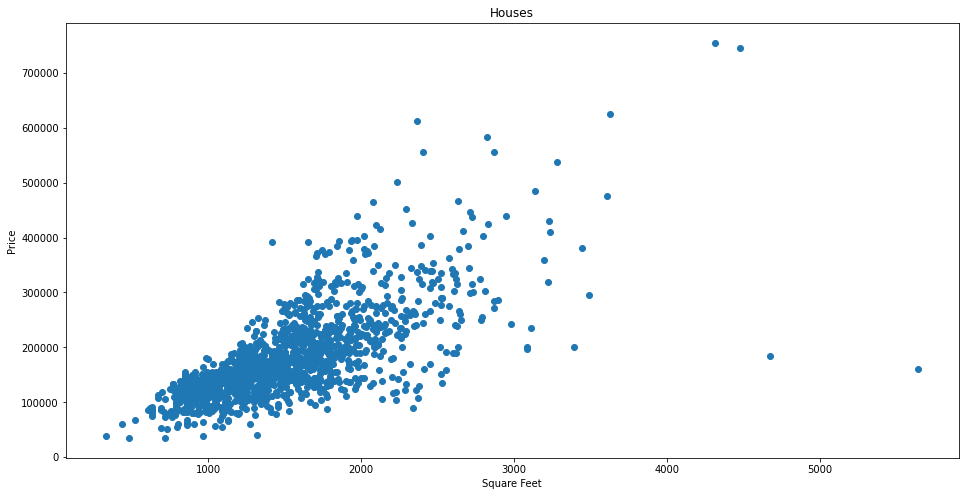

In [305]:
plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Houses')
plt.show()

In [306]:
data = df[['GrLivArea', 'SalePrice']].values.tolist()

In [307]:
def compute_error(data, b, m):

  error = 0

  for d in data:
    x = d[0]
    y = d[1]
    y_hat = b + m * x

    error += (y - y_hat) ** 2

  return np.sqrt(np.mean(error))

In [308]:
compute_error(data, 0, 0)

7549657.664645332

In [309]:
def step(data, b, m, learning_rate):

  grad_b = 0
  grad_m = 0
  N = len(data)

  for d in data:
    x = d[0]
    y = d[1]
    y_hat = b + m * x

    grad_b += - 2/N * (y - y_hat)
    grad_m += - 2/N * x * (y - y_hat)

  new_b = b - learning_rate * grad_b
  new_m = m - learning_rate * grad_m

  return new_b, new_m

In [310]:
step(data, 0, 0, 0.001)

(361.84239178082163, 607482.2197506854)

In [311]:
def gradient_descent(data, initial_b, initial_m, learning_rate, epochs):

  b = initial_b
  m = initial_m

  cost_graph = []
  b_progress = []
  m_progress = []

  for i in range(epochs):
    cost_graph.append(compute_error(data, b, m))
    b, m = step(data, b, m, learning_rate)
    b_progress.append(b)
    m_progress.append(m)

  return b, m, b_progress, m_progress, cost_graph

In [312]:
initial_b = 0
initial_m = 0
learning_rate = 0.0000001
epochs = 10

b, m, b_progress, m_progress, cost_graph = gradient_descent(data, initial_b, initial_m, learning_rate, epochs)

error = compute_error(data, b, m)
print(b, m, error)

0.07348566871960406 117.98317536290897 2153647.2677922393


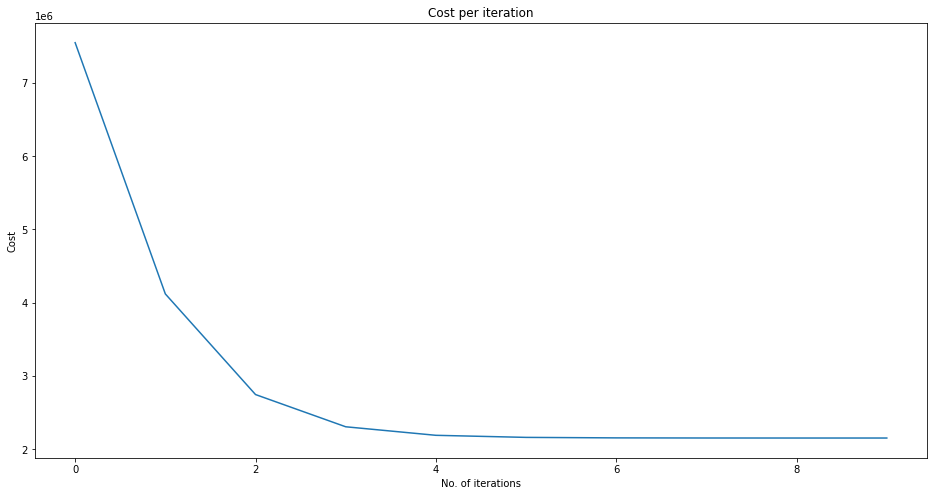

In [313]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

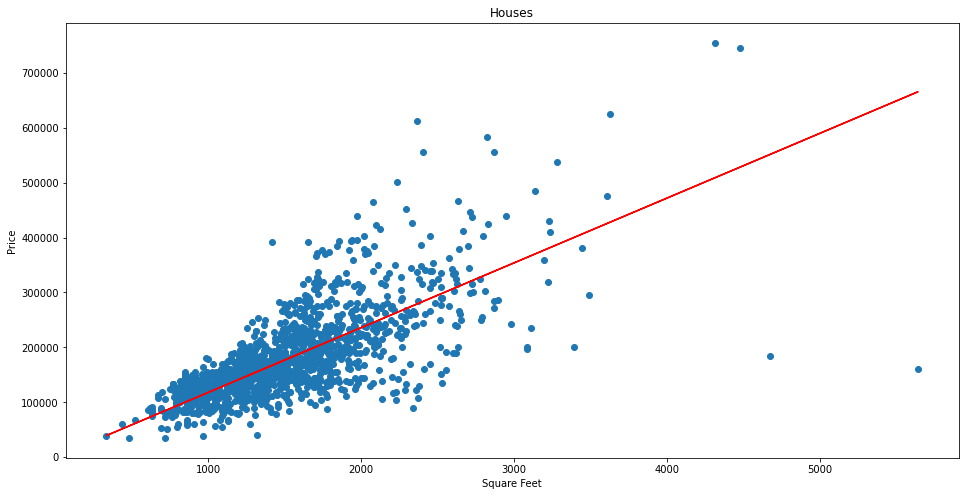

In [314]:
plt.scatter(df.GrLivArea, df.SalePrice)
plt.plot(df.GrLivArea, b + m * df.GrLivArea, c='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Houses')
plt.show()

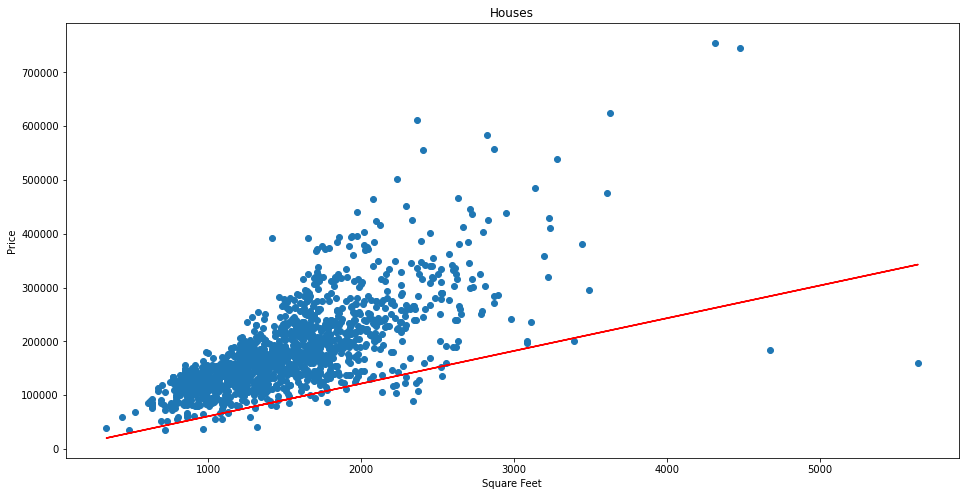

In [315]:
x = df.GrLivArea
y = df.SalePrice

fig = plt.figure()
ax = fig.add_subplot(111)
b = b_progress[0]
m = m_progress[0]
pred = m * x + b

line = ax.plot(x, pred, '-',c='r')[0]

def animate(i, b_prog, m_prog):
    pred = m_prog[i] * x + b_prog[i]
    line.set_data(x, pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(b_progress), fargs=(b_progress,m_progress,))
plt.scatter(x, y)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Houses')
HTML(ani.to_jshtml())

In [316]:
# Otra forma de cálculo ahorrándonos algún bucle

m = 0
c = 0

L = 0.0000001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.05838193343427786 0.0009684744075072423


# 3. Clasificación

In [317]:
!curl -O https://raw.githubusercontent.com/next-guillermofernandez/ninja-ml-workshop/main/titanic/train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61194  100 61194    0     0   429k      0 --:--:-- --:--:-- --:--:--  429k


In [318]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [319]:
def gini_impurity(c):

  p = c.value_counts() / c.shape[0]
  gini = 1 - np.sum(p**2)

  return gini

In [320]:
gini_impurity(df.Survived)

0.4730129578614428

In [321]:
def get_split(df, feature, label):

  values = df[feature].unique()

  gini = 1

  for v in values:
    mask = df[feature] < v
    left_split = df[mask]
    right_split = df[~mask]

    new_gini = gini_impurity(left_split[label]) * left_split.shape[0] / df.shape[0] + \
               gini_impurity(right_split[label]) * right_split.shape[0] / df.shape[0]

    if new_gini < gini:
      gini = new_gini
      value = v

  #print(feature, val, gini)
  return value, gini


In [322]:
get_split(df, 'Age', 'Survived')

(7.0, 0.4617298323560298)

In [323]:
def build_tree(df, features, label):

  tree = dict()
  gini = 1
  feature = None
  value = None

  for f in features:
    v, new_gini = get_split(df, f, label)

    if new_gini < gini:
      remaining_ft = list(filter(lambda x: x != f, features))
      gini = new_gini
      feature = f
      value = v

  if not remaining_ft:
    tree['ft'] = f
    tree['value'] = value
    tree['gini'] = np.round(gini, 4)
    tree['size'] = df.shape[0]

    mask1 = df[label] == 1
    mask2 = df[feature] < value
    tree['left <'] = {'0': df[~mask1 & mask2].shape[0], '1': df[mask1 & mask2].shape[0]}
    tree['right >='] = {'0': df[~mask1 & ~mask2].shape[0], '1': df[mask1 & ~mask2].shape[0]}

    return tree

  mask = df[feature] < value
  left_split = df[mask]
  right_split = df[~mask]

  tree['ft'] = feature
  tree['value'] = value
  tree['gini'] = np.round(gini, 4)
  tree['size'] = df.shape[0]
  tree['left <'] = build_tree(left_split, remaining_ft, label)
  tree['right >='] = build_tree(right_split, remaining_ft, label)

  return tree



In [324]:
tree = build_tree(df, ['Age', 'Fare'], 'Survived')
print(json.dumps(tree, indent=4))

{
    "ft": "Fare",
    "value": 10.5,
    "gini": 0.4304,
    "size": 891,
    "left <": {
        "ft": "Age",
        "value": 17.0,
        "gini": 0.3093,
        "size": 339,
        "left <": {
            "0": 7,
            "1": 7
        },
        "right >=": {
            "0": 265,
            "1": 60
        }
    },
    "right >=": {
        "ft": "Age",
        "value": 7.0,
        "gini": 0.4919,
        "size": 552,
        "left <": {
            "0": 13,
            "1": 32
        },
        "right >=": {
            "0": 264,
            "1": 243
        }
    }
}


In [325]:
def predict(obs, tree):

  if 'ft' in tree.keys():
    
    f = tree['ft']
    if obs[f] < tree['value']:
      label = predict(obs, tree['left <'])
    else:
      label = predict(obs, tree['right >='])

  elif tree['0'] > tree['1']:
    label = 0

  else:
    label = 1

  return label


In [326]:
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [327]:
predict(df.iloc[0], tree)

0

# 4. Clustering

In [328]:
!curl -O https://raw.githubusercontent.com/next-guillermofernandez/ninja-ml-workshop/main/customer-clustering/Mall_Customers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3972  100  3972    0     0  21240      0 --:--:-- --:--:-- --:--:-- 21240


In [329]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


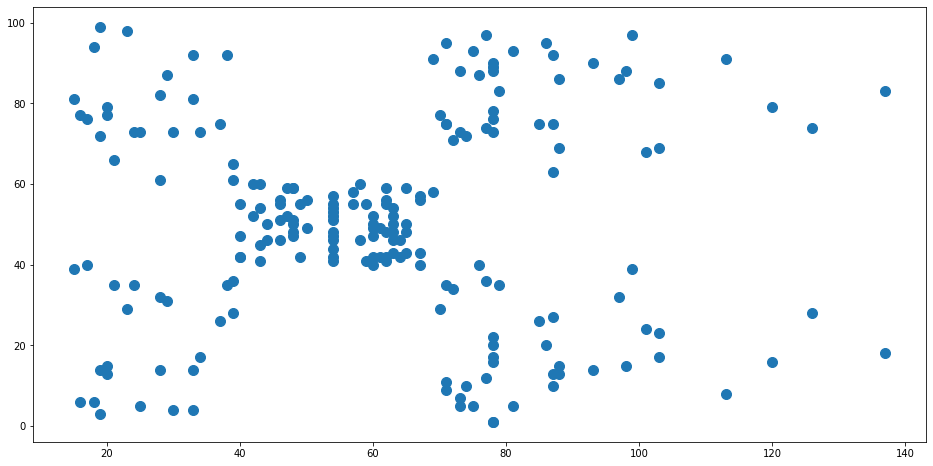

In [330]:
X = df[['Annual_Income_(k$)', 'Spending_Score']].iloc[:, 0]
Y = df[['Annual_Income_(k$)', 'Spending_Score']].iloc[:, 1]
plt.scatter(X, Y, s=100)
plt.show()

In [331]:
K = 3
epochs = 10

aux = df.copy()

for e in range(epochs):

  for k in range(K):

    i = str(k + 1)

    if e == 0:
      aux['c_x_' + i] = random.randint(0, max(X))
      aux['c_y_' + i] = random.randint(0, max(Y))
    else:
      aux['c_x_' + i] = aux[aux.cluster == k + 1]['Annual_Income_(k$)'].mean()
      aux['c_y_' + i] = aux[aux.cluster == k + 1]['Spending_Score'].mean()

    aux['d_' + i] = np.sqrt(np.sum((aux[['Annual_Income_(k$)', 'Spending_Score']].values - aux[['c_x_' + i, 'c_y_' + i]].values)**2, axis=1))


  cols = list()

  for k in range(K):
    cols.append('d_' + str(k + 1))

  aux['cluster'] = np.argmin(aux[cols].values, axis=1) + 1

  if e == 0:
    c_prog = aux.cluster
  else:
    c_prog = np.c_[c_prog, aux.cluster]

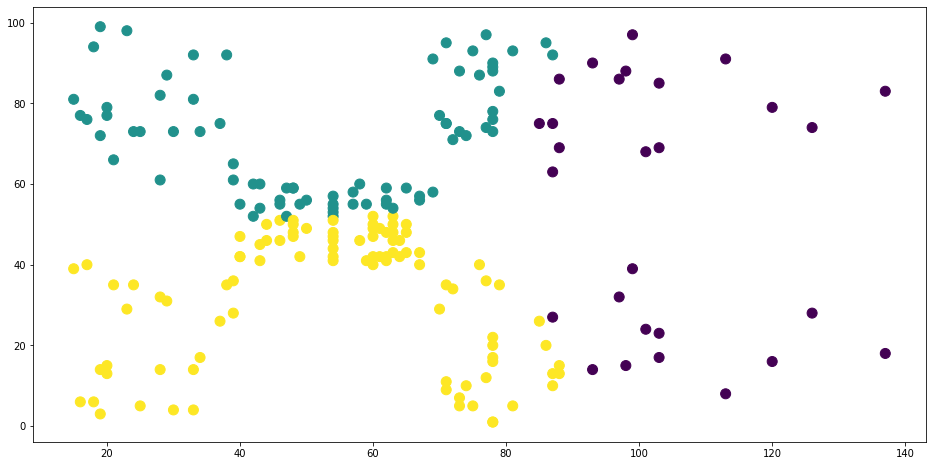

In [332]:
X_ = aux[['Annual_Income_(k$)', 'Spending_Score']].iloc[:, 0]
Y_ = aux[['Annual_Income_(k$)', 'Spending_Score']].iloc[:, 1]

plt.scatter(X_, Y_, c=aux.cluster, s=100)
plt.show()

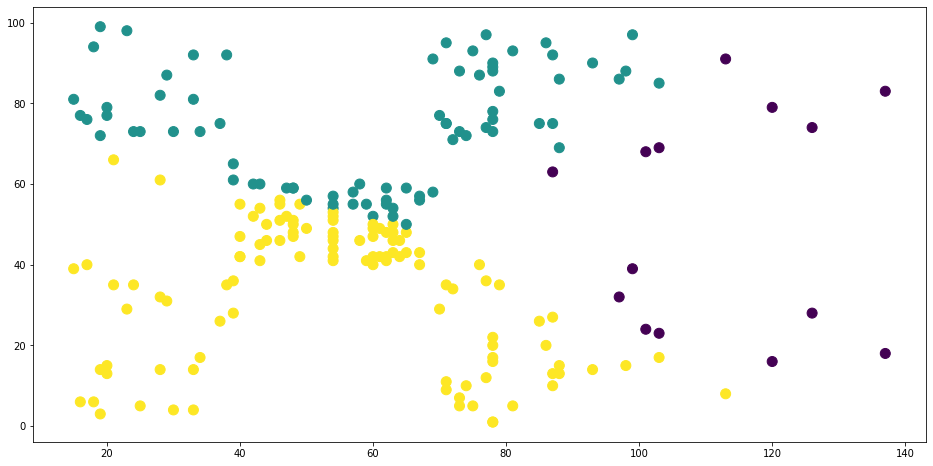

In [333]:
def update_plot(i, data, scat):
    scat.set_array(data[:, i])
    return scat,

fig = plt.figure()
scat = plt.scatter(X_, Y_, c=c_prog[:,0], s=100)

ani = animation.FuncAnimation(fig, 
                              update_plot, 
                              frames=c_prog.shape[1], 
                              fargs=(c_prog, scat))
HTML(ani.to_jshtml())

A partir de este punto se efectúa una ejecución manual habiendo cambiado anteriormente el número de clústers K, para ir recogiendo el coste asociado y poder representar la gráfica sobre la que aplicar el "método del codo".

In [172]:
cost = dict()

In [173]:
partial_cost = 0

for k in range(K):
  i = str(k + 1)
  partial_cost += aux[aux.cluster == k + 1]['d_' + i].sum()

cost[K] = partial_cost

In [174]:
cost

{2: 5141.802201232702,
 3: 3899.705512700313,
 4: 3881.6569557737585,
 5: 2602.972578838644,
 6: 2339.045290879172,
 7: 2159.1216909475006}

In [193]:
keys = np.sort(np.fromiter(cost.keys(), dtype=float))
vals = np.sort(np.fromiter(cost.values(), dtype=float))[::-1]

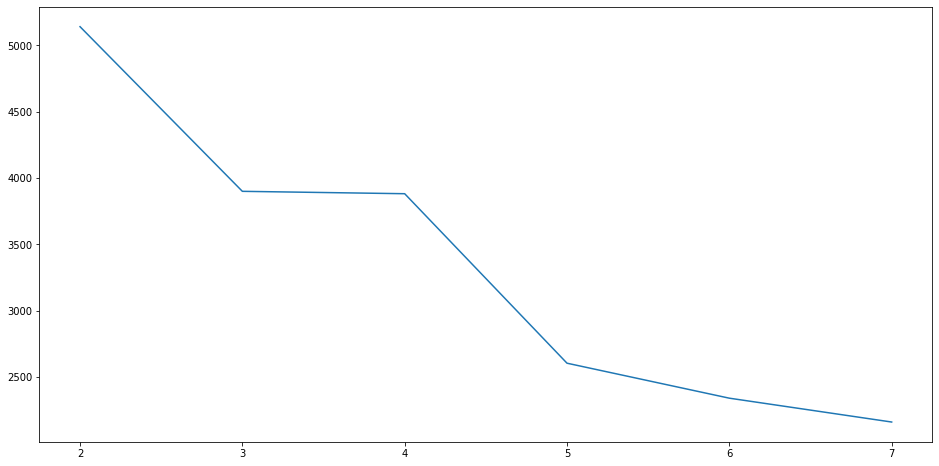

In [196]:
fig = plt.figure()
plt.plot(keys, vals)